## Importing packages ##

In [11]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score , roc_auc_score , make_scorer # ROC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Importing Data ##

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data_set/final_dataset_smes.csv') 
df.drop('Unnamed: 0',axis=1, inplace=True)
print(df)
df["status"].value_counts()

       status    V_1   V_2   V_3   V_4   V_5     V_6    V_7   V_8   V_9  ...  \
0           1   3.30  0.62  1.30  0.96  0.70    0.94 -21.75 -0.12 -0.53  ...   
1           1  -7.93 -0.19  0.87  1.35  1.34  225.95 -42.44 -0.59 -8.12  ...   
2           1   1.24  0.41  1.81  1.14  0.65    1.10 -10.84 -0.08 -0.21  ...   
3           1  -1.16 -0.68  0.14  1.60  0.87    2.23 -16.29 -0.27 -0.05  ...   
4           1  -1.90 -0.86  0.47  0.42  0.42   -1.78 -13.83 -0.24 -0.23  ...   
...       ...    ...   ...   ...   ...   ...     ...    ...   ...   ...  ...   
15040       0  -3.98 -1.91  0.75  0.73  0.73   -9.98   6.45  0.31 -0.77  ...   
15041       0   6.85  0.00  1.15  1.05  0.24    1.53   1.14  0.03  0.01  ...   
15042       0   3.49  0.00  1.29  1.28  1.28    2.67   5.34  0.02  0.09  ...   
15043       0   0.16  0.00  7.24  7.01  7.01   26.77  -1.73 -0.03 -0.05  ...   
15044       0  29.18  0.00  1.03  1.27  1.23    9.22 -89.10 -0.02 -0.54  ...   

       V_15  V_16  V_17  V_18  V_19  V_

0    13413
1     1632
Name: status, dtype: int64

## Splitting data into two (Train and Test) ##

In [4]:
var_columns = [c for c in df.columns if c !='status']
X= df.loc[:, var_columns] # the variables that we're gonna use to build our model
y= df.loc[:, "status"] # the result we wanna acheive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #"test_size=0.2"=>the proportion of the dataset to include in the test split X/y_valid (test 20% train 80%)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12036, 24), (3009, 24), (12036,), (3009,))

## MLP Model ##
We will now create the MLP Model

In [5]:
MLP = MLPClassifier(max_iter=500, activation='relu')
MLP.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

now we will train the MLP model

In [6]:
MLP.fit(X_train, y_train)

MLPClassifier(max_iter=500)

##Evaluation of the model##

Now we will draw the confusion matrix for our first model 

In [7]:
pred = MLP.predict(X_test)
confusion_matrix(y_test,pred)



array([[2582,   69],
       [ 265,   93]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


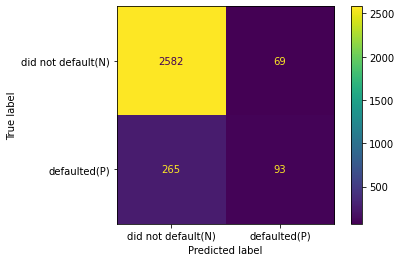

In [24]:
 plot_confusion_matrix(MLP,# our model
                       X_test,# test data set
                       y_test,
                      display_labels=["did not default(N)","defaulted(P)"])

Now we will evaluate the model using the auc




In [23]:
y_train_pred = MLP.predict_proba(X_train)[:,1]
y_test_pred = MLP.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.7277
AUC Test: 0.7231


Now we will evaluate the model using the accuracy score

In [27]:
for i in range(0, X_test.shape[0]): 
    if y_test_pred[i]>=.5:       # setting threshold to .5 
       y_test_pred[i]=1 
    else: 
       y_test_pred[i]=0  

print('the accuracy of MLP is',accuracy_score(y_test_pred, y_test))  

the accuracy of MLP is 0.8889996676636757


##Improoving the model##

we are going to use griDsearchCV to have the best set of hyperparams for our MLP model

In [15]:
MLP_gs = MLPClassifier(max_iter=500)

In [16]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(MLP_gs, parameter_space, n_jobs=-1, cv=2)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [17]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}


After knowing which is the best set of params we will construct our model

In [18]:
MLP_f = MLPClassifier(max_iter=500, activation='tanh',alpha=0.0001,hidden_layer_sizes=(20,),learning_rate="constant",solver="adam")
MLP_f.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(20,), max_iter=500)

##Evaluation of the second model##

Now we will draw the confusion matrix

In [19]:
pred = MLP_f.predict(X_test)
confusion_matrix(y_test,pred)


array([[2625,   26],
       [ 330,   28]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


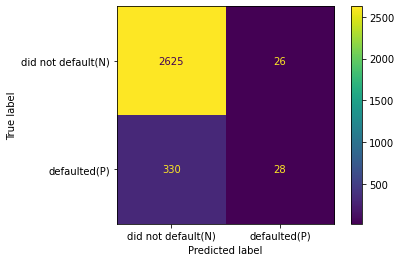

In [25]:
 plot_confusion_matrix(MLP_f,# our model
                       X_test,# test data set
                       y_test,
                      display_labels=["did not default(N)","defaulted(P)"])

Now we will evaluate the model using the auc

In [21]:
y_train_pred = MLP_f.predict_proba(X_train)[:,1]
y_test_pred = MLP_f.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.7856
AUC Test: 0.7829


Now we will evaluate the model using the accuracy score

In [22]:
for i in range(0, X_test.shape[0]): 
    if y_test_pred[i]>=.5:       # setting threshold to .5 
       y_test_pred[i]=1 
    else: 
       y_test_pred[i]=0  

print('the accuracy is',accuracy_score(y_test_pred, y_test))  

the accuracy is 0.8816882685277501
